<a href="https://colab.research.google.com/github/kohi2112002/WineQuality/blob/cMatrix/WineQuality_CMATRIX_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone **DATA**


In [1]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

In [2]:
!git clone https://github.com/kohi2112002/WineQuality.git

Cloning into 'WineQuality'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 7), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [3]:
# upload file to drive
red_path = '/content/WineQuality/winequality-red.csv'
white_path = '/content/WineQuality/winequality-white.csv'

In [4]:
# read file into dataframe
red_df = pd.read_csv(red_path)
white_df = pd.read_csv(white_path)

In [5]:
# check 
print(red_df.shape)
print(white_df.shape)

(1599, 12)
(4898, 12)


In [6]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# spilt data (red and white wine datasets) into training and test sets. 
# Repeat the process 3 times, ensuring each repeat is different 

r_train_1, r_test_1 = train_test_split(red_df, test_size = 0.1, random_state = 42)
r_train_2, r_test_2 = train_test_split(red_df, test_size = 0.1, random_state = 41)
r_train_3, r_test_3 = train_test_split(red_df, test_size = 0.1, random_state = 40)
w_train_1, w_test_1 = train_test_split(white_df, test_size = 0.1, random_state = 42)
w_train_2, w_test_2 = train_test_split(white_df, test_size = 0.1, random_state = 41)
w_train_3, w_test_3 = train_test_split(white_df, test_size = 0.1, random_state = 40)

y_train_1,y_test_1 =  train_test_split(red_df['quality'], test_size = 0.1, random_state = 42)
y_train_1,y_test_2 =  train_test_split(red_df['quality'], test_size = 0.1, random_state = 41)
y_train_1,y_test_3 =  train_test_split(red_df['quality'], test_size = 0.1, random_state = 40)
y_train_1,y_test_4 =  train_test_split(white_df['quality'], test_size = 0.1, random_state = 42)
y_train_1,y_test_5 =  train_test_split(white_df['quality'], test_size = 0.1, random_state = 41)
y_train_1,y_test_6 =  train_test_split(white_df['quality'], test_size = 0.1, random_state = 40)

Y_test = [y_test_1, y_test_2, y_test_3, y_test_4, y_test_5, y_test_6]

# **Second - Task - Khoi**

In [8]:
# Test 1 # Copy Data
k_r_tr_1 = r_train_1.copy()
k_r_ts_1 = r_test_1.copy()
k_w_tr_1 = w_train_1.copy()
k_w_ts_1 = w_test_1.copy()
k_r_tr_2 = r_train_2.copy()
k_r_ts_2 = r_test_2.copy()
k_w_tr_2 = w_train_2.copy()
k_w_ts_2 = w_test_2.copy()
k_r_tr_3 = r_train_3.copy()
k_r_ts_3 = r_test_3.copy()
k_w_tr_3 = w_train_3.copy()
k_w_ts_3 = w_test_3.copy()


In [9]:
# export to csv file
k_r_tr_1.to_csv('/content/sample_data/k_r_tr_1.csv')
k_r_ts_1.to_csv('/content/sample_data/k_r_ts_1.csv')
k_w_tr_1.to_csv('/content/sample_data/k_w_tr_1.csv')
k_w_ts_1.to_csv('/content/sample_data/k_w_ts_1.csv')
k_r_tr_2.to_csv('/content/sample_data/k_r_tr_2.csv')
k_r_ts_2.to_csv('/content/sample_data/k_r_ts_2.csv')
k_w_tr_2.to_csv('/content/sample_data/k_w_tr_2.csv')
k_w_ts_2.to_csv('/content/sample_data/k_w_ts_2.csv')
k_r_tr_3.to_csv('/content/sample_data/k_r_tr_3.csv')
k_r_ts_3.to_csv('/content/sample_data/k_r_tr_3.csv')
k_w_tr_3.to_csv('/content/sample_data/k_w_tr_3.csv')
k_w_ts_3.to_csv('/content/sample_data/k_w_ts_3.csv')

In [10]:
#Scaling Data
scaler = MinMaxScaler()
scaler.fit(k_r_tr_1)
scaled_r_tr_1 = scaler.transform(k_r_tr_1)
scaler.fit(k_r_ts_1)
scaled_r_ts_1 = scaler.transform(k_r_ts_1)
scaler.fit(k_w_tr_1)
scaled_w_tr_1 = scaler.transform(k_w_tr_1)
scaler.fit(k_w_ts_1)
scaled_w_ts_1 = scaler.transform(k_w_ts_1)

scaler.fit(k_r_tr_2)
scaled_r_tr_2 = scaler.transform(k_r_tr_2)
scaler.fit(k_r_ts_2)
scaled_r_ts_2 = scaler.transform(k_r_ts_2)
scaler.fit(k_w_tr_2)
scaled_w_tr_2 = scaler.transform(k_w_tr_2)
scaler.fit(k_w_ts_2)
scaled_w_ts_2 = scaler.transform(k_w_ts_2)

scaler.fit(k_r_tr_3)
scaled_r_tr_3 = scaler.transform(k_r_tr_3)
scaler.fit(k_r_ts_3)
scaled_r_ts_3 = scaler.transform(k_r_ts_3)
scaler.fit(k_w_tr_2)
scaled_w_tr_3 = scaler.transform(k_w_tr_3)
scaler.fit(k_w_ts_2)
scaled_w_ts_3 = scaler.transform(k_w_ts_3)

Train_List = [scaled_r_tr_1, scaled_r_tr_2, scaled_r_tr_3, scaled_w_tr_1, scaled_w_tr_2, scaled_w_tr_3]
Test_List = [scaled_r_ts_1, scaled_r_ts_2, scaled_r_ts_3, scaled_w_ts_1, scaled_w_ts_2, scaled_w_ts_3]
str_tr_lst = ['red_train_1', 'red_train_2', 'red_train_3', 'white_train_1', 'white_train_2', 'white_train_3']
str_ts_lst = ['red_test_1', 'red_test_2', 'red_test_3', 'white_test_1', 'white_test_2', 'white_test_3']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


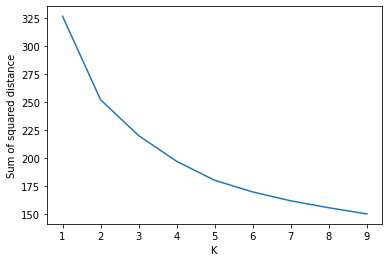

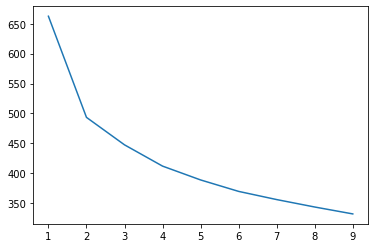

In [11]:
#Choosing K value by Elbow Method
sse_1 = []
sse_2 = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(scaled_r_tr_1)
  sse_1.append(km.inertia_)
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(scaled_w_tr_1)
  sse_2.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared distance')
plt.figure(1)
sns.lineplot(k_rng, sse_1)
plt.figure(2)
sns.lineplot(k_rng, sse_2)

# K = 2,3 is suitable

**How can we pick value of K - the number of clusters**
- We create a method contaning a loop througn a set of test value of k and then calculate the inertia value. The inertia value is the sum of squared distances of samples to their closest cluster center.
- We visualize all inertia value of each K.
- As we can see the higher the value of k is, the smaller the inertia is. That means there exists sum cluster with only some data. That express that the data is poorly divided.
- That's the reason why 2 and 3 are the best number of cluster. 

In [12]:
# Convert silhouette to percentage
def sil2per(sil_score):
  if(sil_score == 0):
    return 50
  elif(sil_score == 1):
    return 100
  elif(sil_score == -1):
    return 0
  elif(sil_score > 0):
    return int(100 - (1 - sil_score)*50)
  elif(sil_score < 0):
    return int((sil_score + 1)*50)

In [24]:
#This function calculate the 
def re_cm(cnf_matrix):
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)
  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)

  return [ACC, TPR, FPR, FNR, PPV]

In [39]:
# Training - Testing - K = 3

train_labels_lst_cls3 = []
test_labels_lst_cls3 = []
train_centroid_lst_cls3 = []
sil_score_lst_cls3 = []
acc_rate_lst_cls3 = []
cm_test_3 = []
all_return_cm = []
for i in range(6):
  #Train
  km = KMeans(n_clusters = 3).fit(Train_List[i]) # Kmean
  train_labels_lst_cls3.append(km.labels_) #Get labels
  train_centroid_lst_cls3.append(km.cluster_centers_) #Get centroids
  #Test train
  train_test = km.predict(Train_List[i]) #Get predicted labels
  test_labels_lst_cls3.append(train_test)
  sil_score = silhouette_score(Train_List[i], train_test) #Get silhouette score
  acc_rate = sil2per(sil_score) #Get accuracy rate
  sil_score_lst_cls3.append(sil_score) #Store sil score
  acc_rate_lst_cls3.append(acc_rate) #Store acc rate
  #Confusion matrix for test
  predicted_label = km.predict(Test_List[i])
  np_test = Y_test[i].to_numpy()
  cmatrix = confusion_matrix(np_test, predicted_label)
  cm_test_3.append(cmatrix)
  all_return_cm.append(re_cm(cmatrix))
  #Show
  # print("The silhouette score of {0} test data: {1}".format(str_ts_lst[i], sil_score))
  # print("The accuracy rate of {0} test data: {1}%".format(str_ts_lst[i], acc_rate))
  # print("The confusion matrix of {0} test data: \n{1}".format(str_ts_lst[i], cmatrix))
  # print("The Accuracy is: {0} \nThe True positive rate is: {1} \nThe False Positive Rate is: {2} \nThe False Negative Rate is:{3} \nThe Precision is {4}".format(all_return_cm[i][0], all_return_cm[i][1],all_return_cm[i][2],all_return_cm[i][3],all_return_cm[i][4]))
  print(predicted_label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


[1 1 2 1 0 1 1 1 2 0 2 1 1 1 2 0 1 2 2 1 1 1 0 0 1 1 2 1 1 2 1 1 2 2 1 1 0
 1 2 0 2 1 2 1 2 1 2 2 1 1 1 2 1 0 1 1 0 1 1 1 1 2 1 1 2 2 2 1 0 2 0 1 2 0
 0 2 0 2 0 0 1 2 1 2 1 2 2 0 2 1 2 0 0 2 1 2 1 1 1 1 1 1 2 0 1 0 2 1 0 2 0
 1 2 2 2 2 0 2 1 1 0 1 2 1 1 1 2 2 2 1 2 1 1 2 1 1 1 1 1 1 2 2 0 1 2 1 0 1
 2 1 1 0 1 1 2 1 1 2 1 2]
[0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 2 1 2 1 2 1 1 1 2 1 1 0 0 1
 0 2 0 0 0 0 0 0 2 1 2 1 0 0 0 0 2 0 0 2 0 0 2 0 1 0 0 0 1 0 0 0 1 0 0 1 2
 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 1 2 1 1 0 1 1 0 0 2 0 0 0 0 2 1 2 0
 1 0 1 1 2 0 1 2 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 2 0 0 0 0 1 0
 0 0 0 1 1 0 1 1 2 0 0 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


[0 1 0 0 1 1 0 0 1 0 2 2 2 2 1 2 2 0 1 1 1 1 1 0 0 1 2 1 2 1 1 2 1 1 1 1 2
 1 1 0 0 2 0 2 0 1 1 0 2 1 0 1 1 0 2 1 0 1 2 1 2 1 1 0 2 0 1 0 2 2 0 0 1 2
 0 1 1 1 0 0 2 2 0 0 2 0 0 1 2 1 1 2 1 1 2 0 0 2 2 1 1 2 1 0 0 0 0 0 1 2 2
 1 2 0 1 1 0 2 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 2 1 2 2 0 2
 0 0 2 2 1 1 0 1 1 2 2 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


[2 0 0 2 0 1 2 2 0 2 0 2 1 1 2 2 0 1 0 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 0 0
 2 2 1 2 2 0 1 2 1 2 2 2 2 2 2 2 1 1 0 1 1 1 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 1 1 0 0 2 2 1 1 0 0 2 1 2 2 1 2 2 0 0 0 0 2 2 1 2 1 0 2 1 2 2 1 1 1 0
 0 0 2 2 0 0 0 2 2 2 0 1 2 1 2 0 1 1 2 1 2 1 0 2 2 2 2 0 2 0 2 0 2 1 2 2 2
 2 2 1 2 1 1 1 2 0 0 0 2 2 2 2 2 2 0 2 1 2 0 2 0 1 2 0 0 2 0 1 1 0 1 0 1 2
 1 0 2 2 2 2 0 0 0 2 2 0 0 2 0 2 2 0 1 2 2 0 1 2 0 2 0 2 0 2 1 2 2 1 0 2 2
 2 0 0 2 1 1 0 2 2 2 1 2 2 0 1 2 2 2 1 2 0 0 0 1 0 2 2 2 2 1 2 2 0 2 0 2 0
 1 2 2 2 2 1 0 2 2 0 2 2 1 1 0 2 1 1 1 1 2 0 2 0 2 2 0 1 2 2 1 1 1 0 2 0 1
 2 0 2 2 2 2 0 1 0 2 2 2 0 1 1 2 1 2 0 0 2 0 2 0 0 1 0 0 1 2 0 2 0 2 1 0 2
 2 2 1 0 1 0 2 2 2 2 2 2 1 0 1 2 2 0 0 1 2 0 2 1 0 0 1 2 2 1 2 2 2 2 2 0 1
 2 2 1 2 0 2 0 2 2 2 0 0 2 0 2 1 0 2 2 2 2 0 2 2 2 2 2 1 0 2 2 1 2 1 2 0 0
 2 0 0 2 0 0 2 2 0 0 2 2 1 0 2 2 0 0 1 2 1 2 1 0 0 0 0 0 2 2 1 2 0 2 1 2 2
 2 0 0 1 2 2 2 2 0 0 0 2 2 1 2 2 2 0 2 0 1 0 2 0 0 2 2 0 0 2 2 2 2 2 1 2 0
 1 2 2 2 0 2 2 2 2]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


[1 2 0 2 2 2 1 1 2 2 2 2 0 1 0 2 0 1 1 2 2 2 0 0 0 2 0 1 0 1 2 1 2 2 2 0 2
 2 1 2 2 0 1 2 2 2 2 1 2 0 1 0 0 0 0 2 2 0 2 2 1 2 2 0 0 0 2 0 2 0 0 2 2 0
 2 1 2 2 2 1 1 2 1 2 2 0 1 1 1 1 2 0 2 0 2 2 1 2 2 2 1 2 0 0 2 0 2 2 2 0 2
 1 2 2 2 0 1 0 2 1 2 0 2 0 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 0 2 2 2 2 1 2 0
 0 2 1 2 0 2 2 2 2 2 2 0 1 2 2 2 2 2 0 0 2 2 2 2 1 1 2 2 2 2 1 0 2 2 2 1 2
 2 1 0 2 1 2 1 0 1 2 1 2 0 0 1 0 1 1 2 2 0 2 2 2 1 1 0 0 2 2 0 0 2 1 1 2 2
 1 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 1 0 2 2 1 1 2 1 2 2 2 0 2 1 2 2 2 2 1 2 0
 0 0 2 0 2 2 0 2 0 2 0 2 2 0 0 2 0 2 2 2 2 1 2 0 2 0 0 2 2 0 2 2 2 0 2 2 2
 2 2 1 2 1 2 2 2 2 1 2 2 0 2 0 2 2 2 0 2 2 2 0 0 2 2 2 2 2 0 2 1 2 2 2 2 2
 2 2 0 1 0 2 2 2 2 2 2 1 0 2 0 2 0 1 2 2 0 2 0 0 2 2 0 2 0 2 2 2 0 2 2 1 1
 2 0 0 1 1 2 1 0 2 0 0 2 2 0 2 2 2 2 0 0 2 2 2 0 2 2 1 2 2 1 0 2 2 0 2 2 2
 2 2 2 2 0 2 2 2 2 0 2 2 0 2 1 2 2 0 2 2 0 1 1 2 2 2 2 2 2 2 0 2 1 2 2 2 1
 2 1 2 2 1 0 0 2 2 1 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 0
 2 2 2 0 2 0 2 1 2]
[1 1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


In [29]:
print(re_cm(cm_test_3[0]))

[array([0.5125 , 0.6625 , 0.825  , 0.99375, 0.98125, 0.575  , 0.5875 ,
       0.8875 , 0.975  ]), array([nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.]), array([0.4875, 0.3375, 0.175 , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    ]), array([nan, nan, nan,  1.,  1.,  1.,  1.,  1.,  1.]), array([ 0.,  0.,  0., nan, nan, nan, nan, nan, nan])]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
plt.figure(figsize=(40,5))
for i in range(3):
  plt.subplot(1,6,i+1)
  plt.scatter(Train_List[i][:, 0], Train_List[i][:, 1], c=train_labels_lst_cls3[i], s=50, cmap='viridis')
  plt.scatter(train_centroid_lst_cls3[i][:, 0], train_centroid_lst_cls3[i][:, 1], c='red', s=200, alpha=0.5);
plt.figure(figsize=(50,5))
for i in range(3,6):
  plt.subplot(1,6,i)
  plt.scatter(Train_List[i][:, 0], Train_List[i][:, 1], c=train_labels_lst_cls3[i], s=50, cmap='viridis')
  plt.scatter(train_centroid_lst_cls3[i][:, 0], train_centroid_lst_cls3[i][:, 1], c='red', s=200, alpha=0.5);

In [ ]:
#Showing Center and Labels of K = 3 Cluster
for i in range(6):
  print("the {0} data has centroids \n{1} \n and labels{2}".format(str_tr_lst[i], train_centroid_lst_cls3[i], train_labels_lst_cls3[i]))
  print('\n')

In [ ]:
# Training - Testing - K = 2

train_labels_lst_cls2 = []
test_labels_lst_cls2 = []
train_centroid_lst_cls2 = []
sil_score_lst_cls2 = []
acc_rate_lst_cls2 = []
for i in range(6):
  #Train
  km = KMeans(n_clusters = 2, algorithm="elkan").fit(Train_List[i]) # Kmean
  train_labels_lst_cls2.append(km.labels_) #Get labels
  train_centroid_lst_cls2.append(km.cluster_centers_) #Get centroids
  #Test
  test = km.predict(Train_List[i]) #Get predicted labels
  test_labels_lst_cls2.append(test)
  sil_score = silhouette_score(Train_List[i], test) #Get silhouette score
  acc_rate = sil2per(sil_score) #Get accuracy rate
  sil_score_lst_cls2.append(sil_score) #Store sil score
  acc_rate_lst_cls2.append(acc_rate) #Store acc rate
  #Show
  print("The silhouette score of {0} test data: {1}".format(str_ts_lst[i], sil_score))
  print("The accuracy rate of {0} test data: {1}%".format(str_ts_lst[i], acc_rate))

In [ ]:
plt.figure(figsize=(40,5))
for i in range(3):
  plt.subplot(1,6,i+1)
  plt.scatter(Train_List[i][:, 0], Train_List[i][:, 1], c=train_labels_lst_cls2[i], s=50, cmap='viridis')
  plt.scatter(train_centroid_lst_cls2[i][:, 0], train_centroid_lst_cls2[i][:, 1], c='red', s=200, alpha=0.5);
plt.figure(figsize=(50,5))
for i in range(3,6):
  plt.subplot(1,6,i)
  plt.scatter(Train_List[i][:, 0], Train_List[i][:, 1], c=train_labels_lst_cls2[i], s=50, cmap='viridis')
  plt.scatter(train_centroid_lst_cls2[i][:, 0], train_centroid_lst_cls2[i][:, 1], c='red', s=200, alpha=0.5);

In [ ]:
#Showing Center and Labels of K = 2 Cluster
for i in range(6):
  print("the {0} data has centroids \n{1} \n and labels{2}".format(str_tr_lst[i], train_centroid_lst_cls2[i], train_labels_lst_cls2[i]))
  print('\n')

# **Third - `Task` - Ha**


1.   Data Preprocessing 
- Import Dataset
- Check missing data (skip this step because no nan values)
- Encoding data
- Split data into train set and test set
- Scalling
2.   Regression
- Check assumptions: linearity, homoscedasity, normality, independence, lack of multicollinearity
- Simple Regression
- Logistic Regression
- For every repeat (using different training sets), the regression model should be trained from scratch. 
- List the obtained regression equations in different repeats.
3. Test the Accuracy
 - 4 confusion matrices: accuracy, true positive, false positive, false negative, precision
 - Mean values of all indices -> model performance of regression

In [ ]:
# data prep, spilt to predictor and response variable
X_r = red_df.iloc[:, :-1]
Y_r = red_df.iloc[:, -1:]
X_w = white_df.iloc[:, :-1]
Y_w = white_df.iloc[:, -1:]

## Variables in the dataset ##




1. Input variables (based on physicochemical tests):
 Input variables (based on physicochemical tests):
- fixed acidity (tartaric acid - g / dm^3): most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- volatile acidity (acetic acid - g / dm^3): the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- citric acid (g / dm^3): found in small quantities, citric acid can add ‘freshness’ and flavor to wines
- residual sugar (g / dm^3): the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- chlorides (sodium chloride - g / dm^3): the amount of salt in the wine
- free sulfur dioxide (mg / dm^3): the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- total sulfur dioxide (mg / dm^3):  amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- density (g / cm^3): the density of water is close to that of water depending on the percent alcohol and sugar content
- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- sulphates (potassium sulphate - g / dm3): a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- alcohol (% by volume): the percent alcohol content of the wine
2. Output variable (based on sensory data): 
- quality (score between 0 and 10): ordinal categorical data

Note: we make do both options - numerical and ordinal dependent variable



In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import statistics as st


In [ ]:
# RED WINE: check correlation between predictors, predictor vs response, and distribution shape of data
p_r = sns.pairplot(red_df)

In [ ]:
# WHITE WINE: check correlation between predictors, predictor vs response, and distribution shape of data
p_w = sns.pairplot(white_df)

Comments:

In both Red and Wine datasets:

High correlation between predictors:


*   Fixed Acidity - voltile acidity (-),citric Acidity (+), density (+), pH (-)
*   Alcohol - density (-)

High correlation between response and predictors
*   Response variable: fixed, voltile, citric acidity, alcohol, density

Skip encoding data part for response variable: quality is rating so it should be ordinal categorical data. But we can also recognize it a numerical data for ease of using model

Skip Scalling because none of the predictors has very skewed distribution. We don't need a general scalling for all the predictors because the betas in the regression equation can do the work



## Repeat 1 ##

Regression method: Wrapper method. Based on the R-squared and the p-value for each predictor in the regression, drop insignificant predictors and keep significant ones. The goal is to obtain a regression equation with the minimum number of predictors while still make good estimation.

*   Red Wine: backward selection (from a full equation, drop predictors)
*   White wine: forward selection (from a 1 predictor function, add one more, etc.)



### Red Wine data ###

In [ ]:
# spilt red wine data into test and training set
X_r_tr1, X_r_t1, Y_r_tr1, Y_r_t1 = train_test_split(X_r, Y_r, test_size = 0.1, random_state = 42)

# export to csv
X_r_tr1.to_csv('/content/sample_data/X_r_tr1.csv')
X_r_t1.to_csv('/content/sample_data/X_r_t1.csv')
Y_r_tr1.to_csv('/content/sample_data/Y_r_tr1.csv')
Y_r_t1.to_csv('/content/sample_data/Y_r_t1.csv')


In [ ]:
print(Y_r_tr1) 

Modeling 'Initial Fit': First, fit a full regression model to both red and wine training datasets

In [ ]:
# using sklearn to fit the model
reg_r = LinearRegression().fit(X_r_tr1, Y_r_tr1)
reg_r.score(X_r_tr1, Y_r_tr1)
reg_r.coef_
Y_r_hat1 = reg_r.predict(X_r_tr1)
Y_r_hat_t1 = reg_r.predict(X_r_t1)
print("R squared: {}".format(r2_score(y_true=Y_r_tr1,y_pred=Y_r_hat1)))


In [ ]:
#MSE & RMSE penalize large errors more than MAE 
mae = mean_absolute_error(Y_r_hat_t1,Y_r_t1)
rmse = math.sqrt(mean_squared_error(Y_r_hat_t1,Y_r_t1))
print('Root Mean Squared Error = ',rmse)
print('Mean Absolute Error = ',mae)
# MSE & RMSE are low because the model takes all variables

In [ ]:
# using statsmodel package to provide description about predictors
X1 = X_r_tr1
X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model1 = sm.OLS(Y_r_tr1, X1).fit()
predictions = model1.predict(X1) # make the predictions by the model

# Print out the statistics
model1.summary()


In [ ]:
print(X1)

In [ ]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X_r_tr1.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_r_tr1.values, i) 
                          for i in range(len(X_r_tr1.columns))]
# print VIF
print(vif_data)

In [ ]:
X1 = X_r_tr1[['volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'chlorides', 'pH', 'sulphates', 'alcohol']]
X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model2 = sm.OLS(Y_r_tr1, X1).fit()
predictions = model2.predict(X1) # make the predictions by the model

# Print out the statistics
model2.summary()

In [ ]:
X1 = X_r_tr1[['volatile acidity', 'free sulfur dioxide', 'chlorides', 'pH', 'sulphates', 'alcohol']]
X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model3 = sm.OLS(Y_r_tr1, X1).fit()
predictions = model3.predict(X1) # make the predictions by the model

# Print out the statistics
model3.summary()

In [ ]:
X1 = X_r_tr1[['volatile acidity', 'chlorides', 'pH', 'sulphates', 'alcohol']]
X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model4 = sm.OLS(Y_r_tr1, X1).fit()
predictions = model4.predict(X1) # make the predictions by the model

# Print out the statistics
model4.summary()

In [ ]:
X1 = X_r_tr1[['volatile acidity', 'chlorides', 'sulphates', 'alcohol']]
X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model5 = sm.OLS(Y_r_tr1, X1).fit()
predictions = model5.predict(X1) # make the predictions by the model

# Print out the statistics
model5.summary()

Repeat 1 - Regression Model 5 -> Red Wine

1.   const = 2.7994
2.   voltile acidity = -1.1481
3.  chlorides = -1.5233
4. sulphates = 0.8375
5. alcohol = 0.2899



In [ ]:
# visualize true quality score and predicted quality score
X1_t = X_r_t1[['volatile acidity', 'chlorides', 'sulphates', 'alcohol']]
X1_t = sm.add_constant(X1_t) ## let's add an intercept (beta_0) to our model
Y1_t = model5.predict(X1_t)


plt.figure(dpi = 75)

plt.scatter(Y_r_t1, Y1_t)

plt.plot(Y_r_t1, Y_r_t1, color="red")

plt.xlabel("Actual Scores")

plt.ylabel("Estimated Scores")

plt.title("Model: Actual vs Estimated Scores")

plt.show()

In [ ]:
# check RMSE of the model
print('rmse', mean_squared_error(Y_r_t1, Y1_t, squared=False))

In [ ]:
# conver the quality 1-8 scale to 0 and 1 to make confusion matrix
cutoff = 5.5
Y1_r_pred = np.zeros_like(Y1_t)    # initialise a matrix full with zeros
Y1_r_pred[Y1_t > cutoff] = 1
print(Y1_r_pred)  

In [ ]:
print(Y_r_t1['quality'].to_numpy)

In [ ]:
Y1_r_test = np.zeros_like(Y1_t)
Y1_r_test[Y_r_t1['quality'].to_numpy() > cutoff] = 1
print(Y1_r_test)

In [ ]:
# confusion_matrix(y_test_classes, y_pred_classes)
cm = confusion_matrix(Y1_r_test, Y1_r_pred)
r1_cm = pd.DataFrame(cm,index = ['Actual: Positive', 'Actual: Negative'], columns= ['Predicted: Positive', 'Predicted: Negative'])

# tp, tn, fp, fn

In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(r1_cm.iloc[0]['Predicted: Positive']/(r1_cm.iloc[0]['Predicted: Positive']+r1_cm.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(r1_cm.iloc[1]['Predicted: Positive']/(r1_cm.iloc[1]['Predicted: Positive']+r1_cm.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(r1_cm.iloc[0]['Predicted: Negative']/(r1_cm.iloc[0]['Predicted: Positive']+r1_cm.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_r1 = precision_score(Y1_r_test, Y1_r_pred)
print('precision = ', p_r1)# accuracy = % right estmation/ all estimation
a_r1 = accuracy_score(Y1_r_test, Y1_r_pred)
print('accuracy = ', a_r1)

### White Wine data ###

In [ ]:
X_w_tr1, X_w_t1, Y_w_tr1, Y_w_t1 = train_test_split(X_w, Y_w, test_size = 0.1, random_state = 42)
X_w_tr1.to_csv('/content/sample_data/X_w_tr1.csv')
X_w_t1.to_csv('/content/sample_data/X_w_t1.csv')
Y_w_tr1.to_csv('/content/sample_data/Y_w_tr1.csv')
Y_w_t1.to_csv('/content/sample_data/Y_w_t1.csv')

In [ ]:
print(Y_w_tr1)

For wine dataset, use the forward selection method

In [ ]:
# VIF dataframe 
vif_data_w = pd.DataFrame() 
vif_data_w["feature"] = X_w_tr1.columns 
  
# calculating VIF for each feature 
vif_data_w["VIF"] = [variance_inflation_factor(X_w_tr1.values, i) 
                          for i in range(len(X_w_tr1.columns))]
# print VIF
print(vif_data_w)

In [ ]:
X1_w = X_w_tr1[['volatile acidity']]
X1_w = sm.add_constant(X1_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model1_w = sm.OLS(Y_w_tr1, X1_w).fit()
predictions = model1_w.predict(X1_w) # make the predictions by the model

# Print out the statistics
model1_w.summary()

In [ ]:
X1_w = X_w_tr1[['volatile acidity', 'residual sugar']]
X1_w = sm.add_constant(X1_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model2_w = sm.OLS(Y_w_tr1, X1_w).fit()
predictions = model2_w.predict(X1_w) # make the predictions by the model

# Print out the statistics
model2_w.summary()

In [ ]:
X1_w = X_w_tr1[['volatile acidity', 'residual sugar', 'chlorides' ]]
X1_w = sm.add_constant(X1_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model3_w = sm.OLS(Y_w_tr1, X1_w).fit()
predictions = model3_w.predict(X1_w) # make the predictions by the model

# Print out the statistics
model3_w.summary()

In [ ]:
X1_w = X_w_tr1[['volatile acidity', 'residual sugar', 'alcohol', 'sulphates']]
X1_w = sm.add_constant(X1_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model4_w = sm.OLS(Y_w_tr1, X1_w).fit()
predictions = model4_w.predict(X1_w) # make the predictions by the model

# Print out the statistics
model4_w.summary()

In [ ]:
X1_w = X_w_tr1[['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'sulphates', 'alcohol']]
X1_w = sm.add_constant(X1_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model5_w = sm.OLS(Y_w_tr1, X1_w).fit()
predictions = model5_w.predict(X1_w) # make the predictions by the model

# Print out the statistics
model5_w.summary()

In [ ]:
X1_w_t = X_w_t1[['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'sulphates', 'alcohol']]
X1_w_t = sm.add_constant(X1_w_t) ## let's add an intercept (beta_0) to our model
Y1_w_t = model5_w.predict(X1_w_t)


plt.figure(dpi = 75)

plt.scatter(Y_w_t1, Y1_w_t)

plt.plot(Y_w_t1, Y_w_t1, color="red")

plt.xlabel("Actual Scores")

plt.ylabel("Estimated Scores")

plt.title("Model: Actual vs Estimated Scores")

plt.show()

Repeat 1 - Wine dataset -model 5 - forward selection
1. const = 1.9085
2. residual sugar = 0.0248
3. free sulfur dioxide = 0.0039
4. sulphates = 0.4209
5. alcohol = 0.3835

In [ ]:
print('rmse', mean_squared_error(Y_w_t1, Y1_w_t, squared=False))

In [ ]:
cutoff = 5.5
Y1_w_pred = np.zeros_like(Y1_w_t)    # initialise a matrix full with zeros
Y1_w_pred[Y1_w_t > cutoff] = 1

Y1_w_test = np.zeros_like(Y1_w_t)
Y1_w_test[Y_w_t1['quality'].to_numpy() > cutoff] = 1

cm = confusion_matrix(Y1_w_test, Y1_w_pred)
w1_cm = pd.DataFrame(cm,index = ['Actual: Positive', 'Actual: Negative'], columns= ['Predicted: Positive', 'Predicted: Negative'])

# tp, tn, fp, fn

In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(w1_cm.iloc[0]['Predicted: Positive']/(w1_cm.iloc[0]['Predicted: Positive']+w1_cm.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(w1_cm.iloc[1]['Predicted: Positive']/(w1_cm.iloc[1]['Predicted: Positive']+w1_cm.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(w1_cm.iloc[0]['Predicted: Negative']/(w1_cm.iloc[0]['Predicted: Positive']+w1_cm.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_w1 = precision_score(Y1_w_test, Y1_w_pred)
print('precision = ', p_w1)
# accuracy = % right estmation/ all estimation
a_w1 = accuracy_score(Y1_w_test, Y1_w_pred)
print('accuracy = ', a_w1)

## Repeat 2 ##



*   Regression Selection Method: Filter method
*   Based on Pearson correlation statistics, choose the best k variables for the model. In this model, we want to get around 4 or 5 predictors because the first repeat is reduced to around this number



### Red Wine Data ###

In [ ]:
X_r_tr2, X_r_t2, Y_r_tr2, Y_r_t2 = train_test_split(X_r, Y_r, test_size = 0.1, random_state = 30)
X_r_tr2.to_csv('/content/sample_data/X_r_tr2.csv')
X_r_t2.to_csv('/content/sample_data/X_r_t2.csv')
Y_r_tr2.to_csv('/content/sample_data/Y_r_tr2.csv')
Y_r_t2.to_csv('/content/sample_data/Y_r_t2.csv')

In [ ]:
# define feature selection
fs = SelectKBest(score_func=f_regression, k=5)
# apply feature selection
X2_r_selected = fs.fit_transform(X_r_tr2, Y_r_tr2)
print(X2_r_selected[:5])


In [ ]:
X_r_tr2.head(5)

In [ ]:
X2 = X_r_tr2[['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']]
X2 = sm.add_constant(X2) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model_r2 = sm.OLS(Y_r_tr2, X2).fit()
predictions = model_r2.predict(X2) # make the predictions by the model

# Print out the statistics
model_r2.summary()

In [ ]:
X2_t = X_r_t2[['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']]
X2_t = sm.add_constant(X2_t) ## let's add an intercept (beta_0) to our model
Y2_t = model_r2.predict(X2_t)

plt.figure(dpi = 75)

plt.scatter(Y_r_t2, Y2_t)

plt.plot(Y_r_t2, Y_r_t2, color="red")

plt.xlabel("Actual Scores")

plt.ylabel("Estimated Scores")

plt.title("Model: Actual vs Estimated Scores")

plt.show()


In [ ]:
print('rmse', mean_squared_error(Y_r_t2, Y2_t, squared=False))

In [ ]:
cutoff = 5.5
Y2_r_pred = np.zeros_like(Y2_t)    # initialise a matrix full with zeros
Y2_r_pred[Y2_t > cutoff] = 1

Y2_r_test = np.zeros_like(Y2_t)
Y2_r_test[Y_r_t2['quality'].to_numpy() > cutoff] = 1

cm = confusion_matrix(Y2_r_test, Y2_r_pred)
print(cm)
# tp, tn, fp, fn

In [ ]:
cm = confusion_matrix(Y2_r_test, Y2_r_pred)
r2_cm = pd.DataFrame(cm,index = ['Actual: Positive', 'Actual: Negative'], columns= ['Predicted: Positive', 'Predicted: Negative'])
print(r2_cm)
transfer = r2_cm
# tp, tn, fp, fn

In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(transfer.iloc[0]['Predicted: Positive']/(transfer.iloc[0]['Predicted: Positive']+transfer.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(transfer.iloc[1]['Predicted: Positive']/(transfer.iloc[1]['Predicted: Positive']+transfer.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(transfer.iloc[0]['Predicted: Negative']/(transfer.iloc[0]['Predicted: Positive']+transfer.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_r2 = precision_score(Y2_r_test, Y2_r_pred)
print('precision = ', p_r2 )# accuracy = % right estmation/ all estimation
a_r2 = accuracy_score(Y2_r_test, Y2_r_pred)
print('accuracy = ', a_r2)

### White Wine Data ###

In [ ]:
X_w_tr2, X_w_t2, Y_w_tr2, Y_w_t2 = train_test_split(X_w, Y_w, test_size = 0.1, random_state = 30)
X_w_tr2.to_csv('/content/sample_data/X_w_tr2.csv')
X_w_t2.to_csv('/content/sample_data/X_w_t2.csv')
Y_w_tr2.to_csv('/content/sample_data/Y_w_tr2.csv')
Y_w_t2.to_csv('/content/sample_data/Y_w_t2.csv')

In [ ]:
# define feature selection
fs_w = SelectKBest(score_func=f_regression, k=5)
# apply feature selection
X2_w_selected = fs_w.fit_transform(X_w_tr2, Y_w_tr2)
print(X2_w_selected[:5])

In [ ]:
X_w_tr2.head(5)

In [ ]:
X2_w = X_w_tr2[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'alcohol', 'density']]
X2_w = sm.add_constant(X2_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model_w2 = sm.OLS(Y_w_tr2, X2_w).fit()
predictions = model_w2.predict(X2_w) # make the predictions by the model

# Print out the statistics
model_w2.summary()

In [ ]:
# VIF dataframe 
vif_data_w = pd.DataFrame() 
vif_data_w["feature"] = X2_w.columns 
  
# calculating VIF for each feature 
vif_data_w["VIF"] = [variance_inflation_factor(X2_w.values, i) 
                          for i in range(len(X2_w.columns))]
# print VIF
print(vif_data_w)

In [ ]:
X2_w_t = X_w_t2[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'alcohol', 'density']]
X2_w_t = sm.add_constant(X2_w_t) ## let's add an intercept (beta_0) to our model
Y2_w_t = model_w2.predict(X2_w_t)


plt.figure(dpi = 75)

plt.scatter(Y_w_t2, Y2_w_t)

plt.plot(Y_w_t2, Y_w_t2, color="red")

plt.xlabel("Actual Scores")

plt.ylabel("Estimated Scores")

plt.title("Model: Actual vs Estimated Scores")

plt.show()

In [ ]:
print('rmse', mean_squared_error(Y_w_t1, Y1_w_t, squared=False))

In [ ]:
cutoff = 5.5
Y2_w_pred = np.zeros_like(Y2_w_t)    # initialise a matrix full with zeros
Y2_w_pred[Y2_w_t > cutoff] = 1

Y2_w_test = np.zeros_like(Y2_w_t)
Y2_w_test[Y_w_t2['quality'].to_numpy() > cutoff] = 1

cm = confusion_matrix(Y2_w_test, Y2_w_pred)
w2_cm = pd.DataFrame(cm,index = ['Actual: Positive', 'Actual: Negative'], columns= ['Predicted: Positive', 'Predicted: Negative'])
print(w2_cm)
# tp, tn, fp, fn

In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(w2_cm.iloc[0]['Predicted: Positive']/(w2_cm.iloc[0]['Predicted: Positive']+w2_cm.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(w2_cm.iloc[1]['Predicted: Positive']/(w2_cm.iloc[1]['Predicted: Positive']+w2_cm.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(w2_cm.iloc[0]['Predicted: Negative']/(w2_cm.iloc[0]['Predicted: Positive']+w2_cm.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_w2 = precision_score(Y2_w_test, Y2_w_pred)
print('precision = ', p_w2 )# accuracy = % right estmation/ all estimation
a_w2 = accuracy_score(Y2_w_test, Y2_w_pred)
print('accuracy = ', a_w2)

## Repeat 3 ##

### Red Wine Data ###

In [ ]:
X_r_tr3, X_r_t3, Y_r_tr3, Y_r_t3 = train_test_split(X_r, Y_r, test_size = 0.1, random_state = 37)
X_r_tr3.to_csv('/content/sample_data/X_r_tr3.csv')
X_r_t3.to_csv('/content/sample_data/X_r_t3.csv')
Y_r_tr3.to_csv('/content/sample_data/Y_r_tr3.csv')
Y_r_t3.to_csv('/content/sample_data/Y_r_t3.csv')

In [ ]:

# define feature selection
fs = SelectKBest(score_func=f_regression, k=5)
# apply feature selection
X3_r_selected = fs.fit_transform(X_r_tr3, Y_r_tr3)
print(X3_r_selected[:5])

In [ ]:
X_r_tr3.head(5)

In [ ]:
X3 = X_r_tr3[['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']]
X3 = sm.add_constant(X3) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model_r3 = sm.OLS(Y_r_tr3, X3).fit()
predictions = model_r3.predict(X3) # make the predictions by the model

# Print out the statistics
model_r3.summary()

In [ ]:
X3 = X_r_tr3[['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']]
X3 = sm.add_constant(X3) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model_r3_2 = sm.OLS(Y_r_tr3, X3).fit()
predictions = model_r3_2.predict(X3) # make the predictions by the model

# Print out the statistics
model_r3_2.summary()

In [ ]:
X3_t = X_r_t3[['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']]
X3_t = sm.add_constant(X3_t) ## let's add an intercept (beta_0) to our model
Y3_t = model_r3_2.predict(X3_t)


plt.figure(dpi = 75)

plt.scatter(Y_r_t3, Y3_t)

plt.plot(Y_r_t3, Y_r_t3, color="red")

plt.xlabel("Actual Scores")

plt.ylabel("Estimated Scores")

plt.title("Model: Actual vs Estimated Scores")

plt.show()

In [ ]:
print('rmse', mean_squared_error(Y_r_t3, Y3_t, squared=False))

In [ ]:
cutoff = 5.5
Y3_r_pred = np.zeros_like(Y3_t)    # initialise a matrix full with zeros
Y3_r_pred[Y3_t > cutoff] = 1

Y3_r_test = np.zeros_like(Y2_t)
Y3_r_test[Y_r_t3['quality'].to_numpy() > cutoff] = 1

cm = confusion_matrix(Y3_r_test, Y3_r_pred)
r3_cm = pd.DataFrame(cm,index = ['Actual: Positive', 'Actual: Negative'], columns= ['Predicted: Positive', 'Predicted: Negative'])
print(r3_cm)
# tp, tn, fp, fn

In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(r3_cm.iloc[0]['Predicted: Positive']/(r3_cm.iloc[0]['Predicted: Positive']+r3_cm.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(r3_cm.iloc[1]['Predicted: Positive']/(r3_cm.iloc[1]['Predicted: Positive']+r3_cm.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(r3_cm.iloc[0]['Predicted: Negative']/(r3_cm.iloc[0]['Predicted: Positive']+r3_cm.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_r3 = precision_score(Y3_r_test, Y3_r_pred)
print('precision = ', p_r3)
# accuracy = % right estmation/ all estimation
a_r3 = accuracy_score(Y3_r_test, Y3_r_pred)
print('accuracy = ', a_r3)

### White Wine Data ###

In [ ]:
X_w_tr3, X_w_t3, Y_w_tr3, Y_w_t3 = train_test_split(X_w, Y_w, test_size = 0.1, random_state = 37)
X_w_tr3.to_csv('/content/sample_data/X_w_tr3.csv')
X_w_t3.to_csv('/content/sample_data/X_w_t3.csv')
Y_w_tr3.to_csv('/content/sample_data/Y_w_tr3.csv')
Y_w_t3.to_csv('/content/sample_data/Y_w_t3.csv')

In [ ]:
# define feature selection
fs_w = SelectKBest(score_func=f_regression, k=5)
# apply feature selection
X3_w_selected = fs_w.fit_transform(X_w_tr3, Y_w_tr3)
print(X3_w_selected[:5])

In [ ]:
X_w_tr3.head(5)

In [ ]:
X3_w = X_w_tr3[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'alcohol', 'density']]
X3_w = sm.add_constant(X3_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model_w3 = sm.OLS(Y_w_tr3, X3_w).fit()
predictions = model_w3.predict(X3_w) # make the predictions by the model

# Print out the statistics
model_w3.summary()

In [ ]:
X3_w = X_w_tr3[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'density']]
X3_w = sm.add_constant(X3_w) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order, first y than X
model_w3_1 = sm.OLS(Y_w_tr3, X3_w).fit()
predictions = model_w3_1.predict(X3_w) # make the predictions by the model

# Print out the statistics
model_w3_1.summary()

In [ ]:

# VIF dataframe 
vif_data_w = pd.DataFrame() 
vif_data_w["feature"] = X3_w.columns 
  
# calculating VIF for each feature 
vif_data_w["VIF"] = [variance_inflation_factor(X3_w.values, i) 
                          for i in range(len(X3_w.columns))]
# print VIF
print(vif_data_w)

In [ ]:
X3_w_t = X_w_t3[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'density']]
X3_w_t = sm.add_constant(X3_w_t) ## let's add an intercept (beta_0) to our model
Y3_w_t = model_w3_1.predict(X3_w_t)


plt.figure(dpi = 75)

plt.scatter(Y_w_t3, Y3_w_t)

plt.plot(Y_w_t3, Y_w_t3, color="red")

plt.xlabel("Actual Scores")

plt.ylabel("Estimated Scores")

plt.title("Model: Actual vs Estimated Scores")

plt.show()

In [ ]:
print('rmse', mean_squared_error(Y_w_t3, Y3_w_t, squared=False))

In [ ]:
cutoff = 5.5
Y3_w_pred = np.zeros_like(Y2_w_t)    # initialise a matrix full with zeros
Y3_w_pred[Y3_w_t > cutoff] = 1

Y3_w_test = np.zeros_like(Y3_w_t)
Y3_w_test[Y_w_t3['quality'].to_numpy() > cutoff] = 1

cm = confusion_matrix(Y3_w_test, Y3_w_pred)
w3_cm = pd.DataFrame(cm,index = ['Actual: Positive', 'Actual: Negative'], columns= ['Predicted: Positive', 'Predicted: Negative'])
print(w3_cm)
# tp, tn, fp, fn

In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(w3_cm.iloc[0]['Predicted: Positive']/(w3_cm.iloc[0]['Predicted: Positive']+w3_cm.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(w3_cm.iloc[1]['Predicted: Positive']/(w3_cm.iloc[1]['Predicted: Positive']+w3_cm.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(w3_cm.iloc[0]['Predicted: Negative']/(w3_cm.iloc[0]['Predicted: Positive']+w3_cm.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_w3 = precision_score(Y3_w_test, Y3_w_pred)
print('precision = ', p_w3)# accuracy = % right estmation/ all estimation
a_w3 = accuracy_score(Y3_w_test, Y3_w_pred)
print('accuracy = ', a_w3)

## Summarize ##

In [ ]:
# create empty dataframe to fill the mean confusion matrix for red wine data
sum_cm_r = pd.DataFrame(index = ['Actual: Positive', 'Actual: Negative'], columns = ['Predicted: Positive', 'Predicted: Negative'])
for ind in sum_cm_r.columns:
  sum_cm_r[ind][0] = r1_cm[ind][0] + r2_cm[ind][0] + r3_cm[ind][0]
  sum_cm_r[ind][1] = r1_cm[ind][1] + r2_cm[ind][1] + r3_cm[ind][1]
print(sum_cm_r)


In [ ]:

# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(sum_cm_r.iloc[0]['Predicted: Positive']/(sum_cm_r.iloc[0]['Predicted: Positive']+sum_cm_r.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(sum_cm_r.iloc[1]['Predicted: Positive']/(sum_cm_r.iloc[1]['Predicted: Positive']+sum_cm_r.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(sum_cm_r.iloc[0]['Predicted: Negative']/(sum_cm_r.iloc[0]['Predicted: Positive']+sum_cm_r.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_r = st.mean([p_r1, p_r2, p_r3])
print('precision = ', p_r )# accuracy = % right estmation/ all estimation
a_r = st.mean([a_r1, a_r2, a_r3])
print('accuracy = ', a_r)

In [ ]:
# create empty dataframe to fill the mean confusion matrix for red wine data
sum_cm_w = pd.DataFrame(index = ['Actual: Positive', 'Actual: Negative'], columns = ['Predicted: Positive', 'Predicted: Negative'])
for ind in sum_cm_w.columns:
  sum_cm_w[ind][0] = w1_cm[ind][0] + w2_cm[ind][0] + w3_cm[ind][0]
  sum_cm_w[ind][1] = w1_cm[ind][1] + w2_cm[ind][1] + w3_cm[ind][1]
print(sum_cm_w)

In [ ]:
# true positive rate = Sensitivity/ Recall = (true positive) / all actual positive
print('TPR: ',round(sum_cm_w.iloc[0]['Predicted: Positive']/(sum_cm_w.iloc[0]['Predicted: Positive']+sum_cm_w.iloc[0]['Predicted: Negative']), 5))
# false positive rate = false positive / all actual negative 
print('FPR: ', round(sum_cm_w.iloc[1]['Predicted: Positive']/(sum_cm_w.iloc[1]['Predicted: Positive']+sum_cm_w.iloc[1]['Predicted: Negative']), 5))
# false negative rate = false negative / all actual positive 
print('FNR: ', round(sum_cm_w.iloc[0]['Predicted: Negative']/(sum_cm_w.iloc[0]['Predicted: Positive']+sum_cm_w.iloc[0]['Predicted: Negative']), 5))
# precision = true positive / all predicted positive
p_w = st.mean([p_w1, p_w2, p_w3])
print('precision = ', p_w )# accuracy = % right estmation/ all estimation
a_w = st.mean([a_w1, a_w2, a_w3])
print('accuracy = ', a_w)


# **CONCLUSION**

italicized text+ K means clustering method:
  - In red wine data with k = 2,3 the data is divided quite perfectly while in white data with k = 2,3 the data is separated poorly.
  - The accuracy rate is ranging from 55% to 63%.
+ Linear regression method:
  - The method works well for both red and white dataset.
  - The accuracy rate is above 74% and precision rate is 75.6%.
+ Conclusion:
  - If we seek to understand this dataset, then:
  - In this circumstance and dataset, we should use linear regression instead of k means clustering because of better performance rate and we see that some predictors are highly correlated with the quality variables.
  - The k mean clustering method in this situation only works well for small number of features of data. We should take full advantage of k mean's applications in other problems. Image Segmentation is a typical example.